In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../Resources/non_race_data.csv")
df.head()

,year,state,id,state_code,latitude,longitude,deaths,births,maternal_mortality_ratio,population,...,phys_inac_val,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val
0,2015,Alabama,US.AL,AL,32.318231,-86.902298,12.0,59657.0,20.11,2505795.0,...,27.6,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5
1,2016,Alabama,US.AL,AL,32.318231,-86.902298,35.0,59151.0,59.17,2507714.0,...,31.9,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4
2,2017,Alabama,US.AL,AL,32.318231,-86.902298,41.0,58941.0,69.56,2514911.0,...,29.4,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3
3,2018,Alabama,US.AL,AL,32.318231,-86.902298,31.0,57761.0,53.67,2523756.0,...,32.0,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8
4,2019,Alabama,US.AL,AL,32.318231,-86.902298,35.0,58615.0,59.71,2533668.0,...,30.7,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8


In [11]:
X = df.drop(["year", "state", "id", "state_code", "latitude", "longitude", "deaths", "births", "maternal_mortality_ratio"], axis=1)
y = df["maternal_mortality_ratio"]
print(X.shape, y.shape)

(308, 32) (308,)


In [12]:
# Split data into train and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Scale the data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

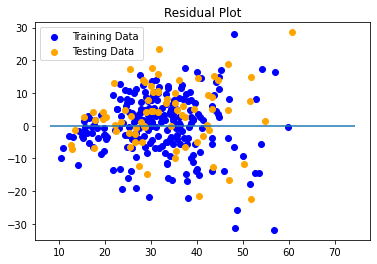

In [14]:
#make linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"Mean Squared Error: {MSE}, Training R2 Score: {train_score}, Testing R2 Score : {test_score}")

Mean Squared Error: 102.73816029180388, Training R2 Score: 0.5235530780090181, Testing R2 Score : 0.4273645551733223
